In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

In [13]:
import awkward as ak
import vector
import glob
import numpy as np

import sklearn.metrics
import yaml
import os

import matplotlib
import mplhep
mplhep.style.use(mplhep.style.CMS)

In [14]:
#get the list of files that were set aside for testing
test_paths = yaml.safe_load(open("../config/datasets/test.yaml", "rb"))["test"]["paths"]
test_paths = [os.path.basename(p) for p in test_paths]

In [81]:
#binary classification outputs
vals_cls_true = []
vals_cls_pred = []

#decay modes
vals_dm_true = []
vals_dm_pred = []

#energy regression outputs
vals_e_true = []
vals_e_pred = []

#loop over the evaluation outputs
for fi in glob.glob("../outputs/2024-03-28/16-23-26/evaluation/SimpleDNN/*/*.parquet"):
    if not os.path.basename(fi) in test_paths:
        continue
    print(fi)

    data = ak.from_parquet(fi)
    
    cls_true = data["gen_jet_tau_decaymode"]!=-1
    cls_pred = data["tauClassifier"]

    dm_true = data["gen_jet_tau_decaymode"]
    dm_pred = data["tau_decaymode"]
    
    tauP4_pred = vector.awk(
        ak.zip(
            {
                "px": data["tau_p4s"].x,
                "py": data["tau_p4s"].y,
                "pz": data["tau_p4s"].z,
                "mass": data["tau_p4s"].tau,
            }
        )
    )
    tauP4_true = vector.awk(
        ak.zip(
            {
                "px": data["gen_jet_tau_p4s"].x,
                "py": data["gen_jet_tau_p4s"].y,
                "pz": data["gen_jet_tau_p4s"].z,
                "energy": data["gen_jet_tau_p4s"].t,
            }
        )
    )
    
    vals_e_pred.append(ak.to_numpy(tauP4_pred.energy))
    vals_e_true.append(ak.to_numpy(tauP4_true.energy))
    
    vals_cls_pred.append(ak.to_numpy(cls_pred))
    vals_cls_true.append(ak.to_numpy(cls_true))

    vals_dm_pred.append(ak.to_numpy(dm_pred))
    vals_dm_true.append(ak.to_numpy(dm_true))
    
vals_cls_true = np.concatenate(vals_cls_true)
vals_cls_pred = np.concatenate(vals_cls_pred)

vals_e_true = np.concatenate(vals_e_true)
vals_e_pred = np.concatenate(vals_e_pred)

vals_dm_true = np.concatenate(vals_dm_true)
vals_dm_pred = np.concatenate(vals_dm_pred)

../outputs/2024-03-28/16-23-26/evaluation/SimpleDNN/QCD/reco_p8_ee_qq_ecm380_103014.parquet
../outputs/2024-03-28/16-23-26/evaluation/SimpleDNN/QCD/reco_p8_ee_qq_ecm380_102289.parquet
../outputs/2024-03-28/16-23-26/evaluation/SimpleDNN/QCD/reco_p8_ee_qq_ecm380_103255.parquet
../outputs/2024-03-28/16-23-26/evaluation/SimpleDNN/QCD/reco_p8_ee_qq_ecm380_100261.parquet
../outputs/2024-03-28/16-23-26/evaluation/SimpleDNN/QCD/reco_p8_ee_qq_ecm380_102791.parquet
../outputs/2024-03-28/16-23-26/evaluation/SimpleDNN/QCD/reco_p8_ee_qq_ecm380_104106.parquet
../outputs/2024-03-28/16-23-26/evaluation/SimpleDNN/QCD/reco_p8_ee_qq_ecm380_104155.parquet
../outputs/2024-03-28/16-23-26/evaluation/SimpleDNN/QCD/reco_p8_ee_qq_ecm380_101988.parquet
../outputs/2024-03-28/16-23-26/evaluation/SimpleDNN/QCD/reco_p8_ee_qq_ecm380_103479.parquet
../outputs/2024-03-28/16-23-26/evaluation/SimpleDNN/QCD/reco_p8_ee_qq_ecm380_104301.parquet
../outputs/2024-03-28/16-23-26/evaluation/SimpleDNN/QCD/reco_p8_ee_qq_ecm380_102

../outputs/2024-03-28/16-23-26/evaluation/SimpleDNN/QCD/reco_p8_ee_qq_ecm380_101634.parquet
../outputs/2024-03-28/16-23-26/evaluation/SimpleDNN/QCD/reco_p8_ee_qq_ecm380_104363.parquet
../outputs/2024-03-28/16-23-26/evaluation/SimpleDNN/QCD/reco_p8_ee_qq_ecm380_104042.parquet
../outputs/2024-03-28/16-23-26/evaluation/SimpleDNN/QCD/reco_p8_ee_qq_ecm380_102824.parquet
../outputs/2024-03-28/16-23-26/evaluation/SimpleDNN/QCD/reco_p8_ee_qq_ecm380_102539.parquet
../outputs/2024-03-28/16-23-26/evaluation/SimpleDNN/QCD/reco_p8_ee_qq_ecm380_100575.parquet
../outputs/2024-03-28/16-23-26/evaluation/SimpleDNN/QCD/reco_p8_ee_qq_ecm380_104338.parquet
../outputs/2024-03-28/16-23-26/evaluation/SimpleDNN/QCD/reco_p8_ee_qq_ecm380_101790.parquet
../outputs/2024-03-28/16-23-26/evaluation/SimpleDNN/QCD/reco_p8_ee_qq_ecm380_102534.parquet
../outputs/2024-03-28/16-23-26/evaluation/SimpleDNN/QCD/reco_p8_ee_qq_ecm380_103110.parquet
../outputs/2024-03-28/16-23-26/evaluation/SimpleDNN/QCD/reco_p8_ee_qq_ecm380_100

../outputs/2024-03-28/16-23-26/evaluation/SimpleDNN/ZH_Htautau/reco_p8_ee_ZH_Htautau_ecm380_204566.parquet
../outputs/2024-03-28/16-23-26/evaluation/SimpleDNN/ZH_Htautau/reco_p8_ee_ZH_Htautau_ecm380_203110.parquet
../outputs/2024-03-28/16-23-26/evaluation/SimpleDNN/ZH_Htautau/reco_p8_ee_ZH_Htautau_ecm380_202878.parquet
../outputs/2024-03-28/16-23-26/evaluation/SimpleDNN/ZH_Htautau/reco_p8_ee_ZH_Htautau_ecm380_204316.parquet
../outputs/2024-03-28/16-23-26/evaluation/SimpleDNN/ZH_Htautau/reco_p8_ee_ZH_Htautau_ecm380_204138.parquet
../outputs/2024-03-28/16-23-26/evaluation/SimpleDNN/ZH_Htautau/reco_p8_ee_ZH_Htautau_ecm380_203866.parquet
../outputs/2024-03-28/16-23-26/evaluation/SimpleDNN/ZH_Htautau/reco_p8_ee_ZH_Htautau_ecm380_204220.parquet
../outputs/2024-03-28/16-23-26/evaluation/SimpleDNN/ZH_Htautau/reco_p8_ee_ZH_Htautau_ecm380_202738.parquet
../outputs/2024-03-28/16-23-26/evaluation/SimpleDNN/ZH_Htautau/reco_p8_ee_ZH_Htautau_ecm380_201412.parquet
../outputs/2024-03-28/16-23-26/evalua

In [82]:
np.unique(vals_dm_true, return_counts=True)

(array([-1,  0,  1,  2,  3,  4, 10, 11, 12, 15]),
 array([18962,  1550,  4471,  1890,   240,    10,  1785,   884,    99,
           17]))

In [83]:
np.unique(vals_dm_pred, return_counts=True)

(array([ 0,  1,  2,  3,  4, 10, 11, 12]),
 array([1630, 6277, 2342,  471,  782, 2614, 6789, 9003]))

In [84]:
fpr, tpr, _ = sklearn.metrics.roc_curve(vals_cls_true, vals_cls_pred)

## Binary classification output

Text(0, 1, 'number of jets / bin')

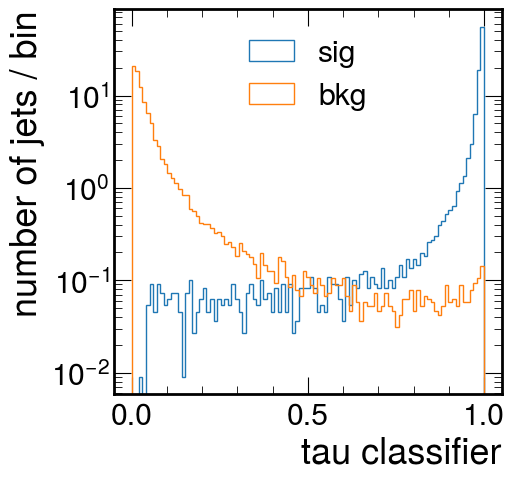

In [85]:
plt.figure(figsize=(5,5))
b = np.linspace(0.0, 1, 100)
plt.hist(vals_cls_pred[vals_cls_true==1], bins=b, density=1, histtype="step", label="sig")
plt.hist(vals_cls_pred[vals_cls_true==0], bins=b, density=1, histtype="step", label="bkg");
plt.yscale("log")
plt.legend()
plt.xlabel("tau classifier")
plt.ylabel("number of jets / bin")

(1e-05, 1)

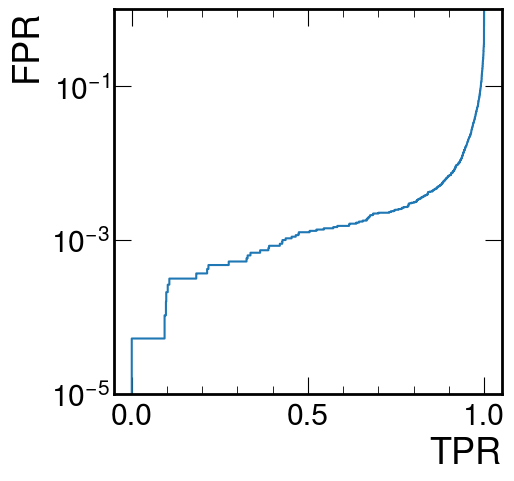

In [86]:
plt.figure(figsize=(5,5))
plt.plot(tpr, fpr)
#plt.plot([0,1], [0,1], color="black", ls="--")
plt.xlabel("TPR")
plt.ylabel("FPR")
plt.yscale("log")
plt.ylim(1e-5, 1)

## Energy regression output

In [87]:
#for energy regression and decay mode, we focus only on the jets which are taus in simulation
mask_true_had_tau = (vals_cls_true==1) & (vals_dm_true!=16)

Text(0, 1, 'Reconstructed energy')

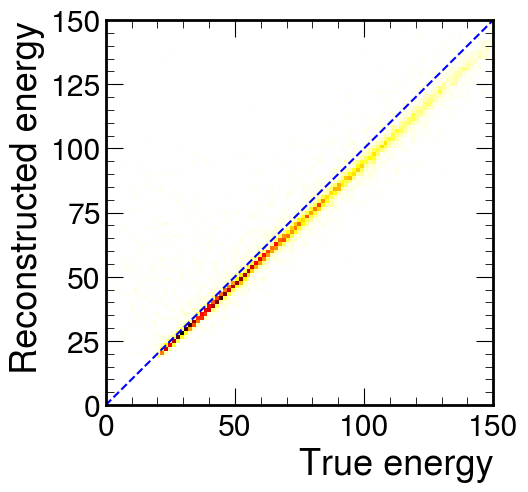

In [88]:
plt.figure(figsize=(5,5))
b = np.linspace(0,150,100)
plt.hist2d(vals_e_true[mask_true_had_tau], vals_e_pred[mask_true_had_tau], (b, b), cmap="hot_r");
plt.plot([0,150],[0,150], color="blue", ls="--")
plt.xlabel("True energy")
plt.ylabel("Reconstructed energy")

Text(1, 0, '$E_{reco}/E_{true}$')

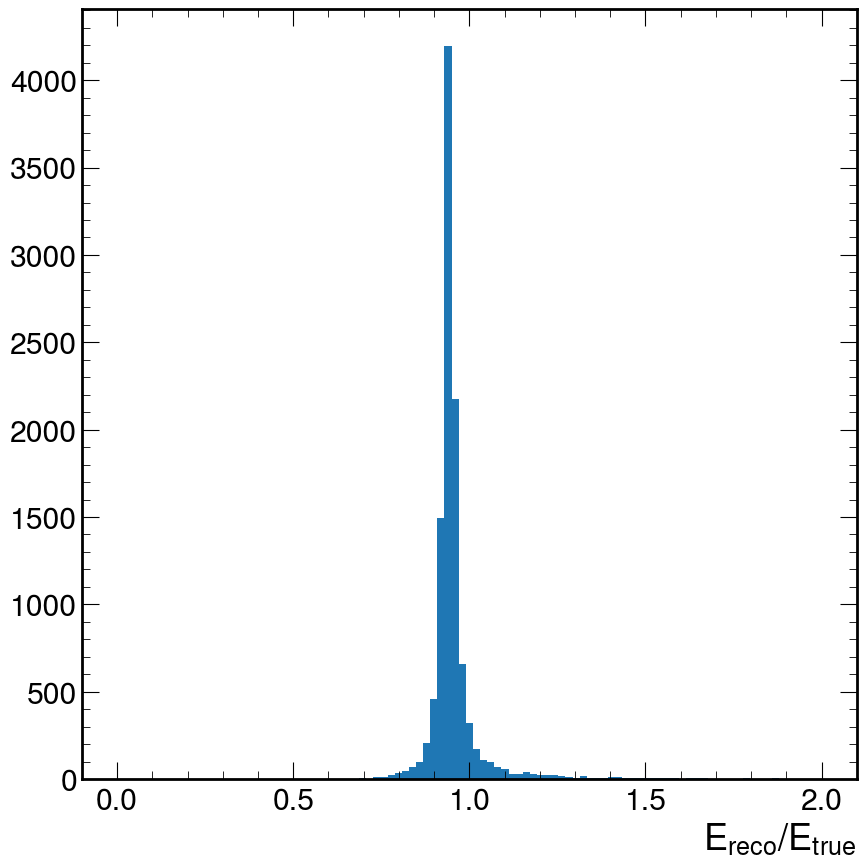

In [89]:
b = np.linspace(0,2,100)
plt.hist(vals_e_pred[mask_true_had_tau]/vals_e_true[mask_true_had_tau], bins=b);
plt.xlabel("$E_{reco}/E_{true}$")

Text(1, 0, '$E_{reco} - E_{true}$ [GeV]')

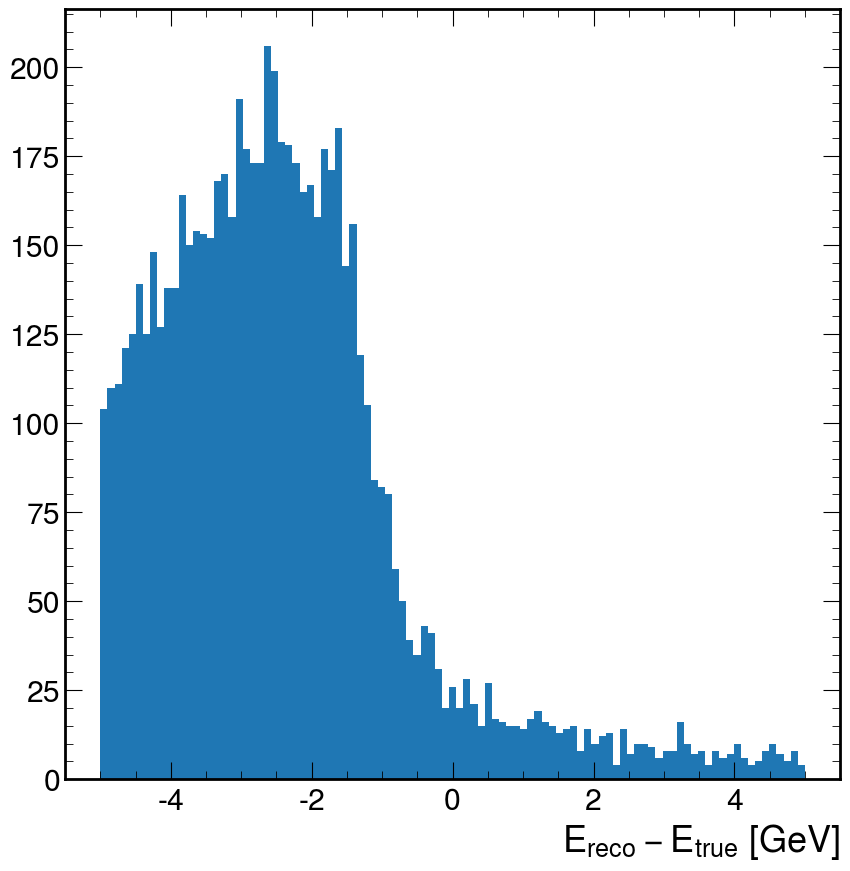

In [90]:
b = np.linspace(-5,5,100)
plt.hist(vals_e_pred[mask_true_had_tau] - vals_e_true[mask_true_had_tau], bins=b);
plt.xlabel("$E_{reco} - E_{true}$ [GeV]")

## Decay mode multiclass output

In [91]:
confusion_matrix = sklearn.metrics.confusion_matrix(
    vals_dm_true[mask_true_had_tau],
    vals_dm_pred[mask_true_had_tau], labels=range(16))
acc = sklearn.metrics.accuracy_score(
    vals_dm_true[mask_true_had_tau],
    vals_dm_pred[mask_true_had_tau])

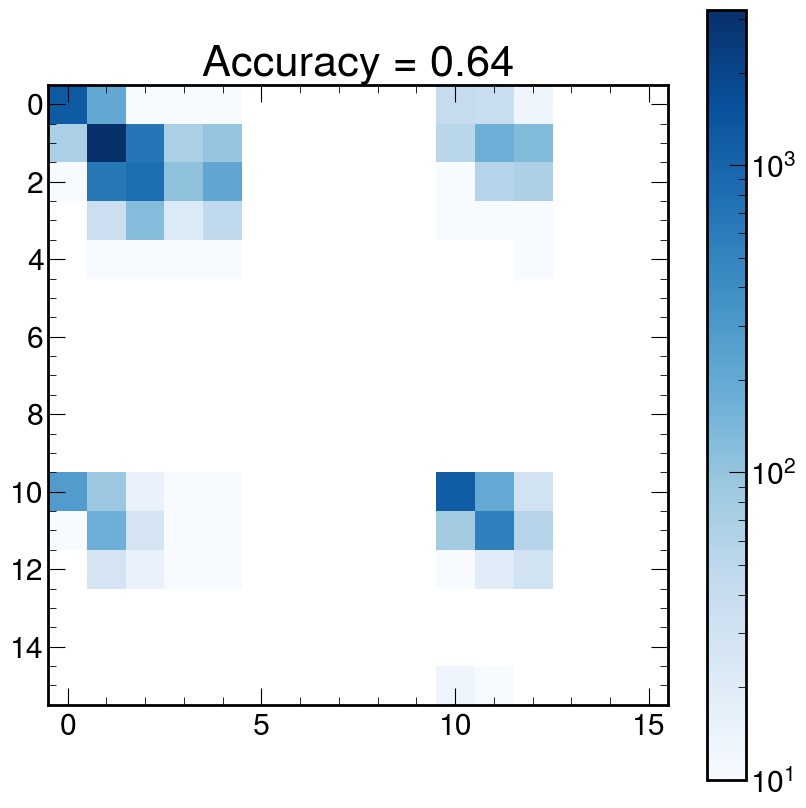

In [92]:
plt.imshow(confusion_matrix, cmap="Blues", norm=matplotlib.colors.LogNorm(vmin=10))
plt.colorbar()
plt.title("Accuracy = {:.2f}".format(acc));